In [1]:
%pylab inline
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


/mnt/shared_conda/envs/micro/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/mnt/shared_conda/envs/micro/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/mnt/shared_conda/envs/micro/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/mnt/shared_conda/envs/micro/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: Setting LC_MONETARY failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/mnt/shared_conda/envs/micro/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 3: Setting LC_PAPER failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/mnt/shared_conda/envs/micro/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 4: Setting LC_MEASU

jupyter: 

/mnt/wagabi/ngslub18/jupyter_run

- git clone https://github.com/macieksk/ngslub18.git
- in byobu jupyter_run.sh xxxx # xxxx is unique port number for each user
- ssh config:
Host ngslub18
    User wagabi
    Hostname 147.228.242.15
    ForwardX11 yes
    LocalForward localhost:5xxxx localhost:xxxx


In [2]:
%%bash
ls

EM_abundance_eg_R
NGSchool.ipynb
NGSworkshop-Friday.ipynb
NGSworkshop-Saturday.ipynb
NGSworkshop.ipynb
Snakefile
dag.png
debarcoded.BC01
debarcoded.BC02
debarcoded.BC05
debarcoded.BC06
debarcoded.BC08
debarcoded.BC09
debarcoded.none
example.fasta
example1.fasta
example2.fasta
example3.fasta
example4.fasta
example_p4.fasta
example_p4.fastq
firstfile.tsv
joined.tsv
jupyter_run.sh
krona
out1.tsv
out2.tsv


In [3]:
%%latex
Equation:
$$0=e^{i\pi}-1$$

<IPython.core.display.Latex object>

In [4]:
import numpy as np
np.matrix([[0,1],[2,3]])

matrix([[0, 1],
        [2, 3]])

In [5]:
%pylab inline
%load_ext rpy2.ipython
# pip3 install --user matplotlib rpy2 pandas # in terminal if needed

Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


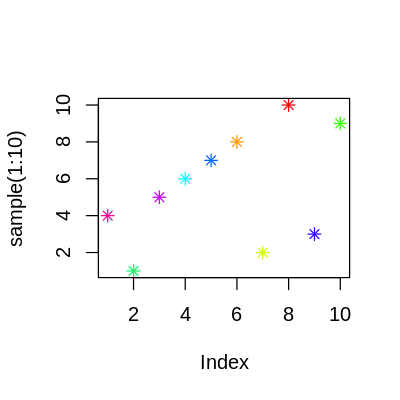

In [6]:
%%R -w 400 -h 400 -r 120
plot(sample(1:10),col=sample(rainbow(10)),pch=8)

### Practice #1
#### What are best options for remote synchronization using *rsync*?

### Prompts:
- what about subfolders?
- what about links in folders?
- what about unchanged access permitions on each file (owner is owner)?


* -a, --archive               archive mode; equals -rlptgoD (no -H,-A,-X)<br>
* -r, --recursive             recurse into directories<br>
* -l, --links                 copy symlinks as symlinks<br>
* -p, --perms                 preserve permissions<br>
* -t, --times                 preserve modification times<br>
* -g, --group                 preserve group<br>
     --devices               preserve device files (super-user only)<br>
     --specials              preserve special files<br>
* -D                          same as --devices --specials<br>
* -o, --owner                 preserve owner (super-user only)<br>


* -z, --compress              compress file data during the transfer
     --compress-level=NUM    explicitly set compression level   ex. 9
* --partial-dir=DIR       put a partially transferred file into DIR
* --partial               keep partially transferred files  
* -h, --human-readable        output numbers in a human-readable format
* --no-o 
* --groupmap=*:GROUPONREMOTE 
* --chmod=Dg+s,ug+r,go-w,o-rwx to change permision

Incremental recursion can be disabled using the --no-inc-recursive
    option or its shorter --no-i-r alias. 



### Practise #2
#### What options need to be added to run rsync live... safely?

### Prompts:
- what about half-created files?
- when to finish coping?

- -partial-dir=DIR       put a partially transferred file into DIR
- -partial               keep partially transferred files


#### *How to rsync only files in fastq format

In [ ]:
## Please update snakemake in terminal
pip3 install --user --upgrade snakemake

## Example #1
Divide file into 3 equal files.

In [ ]:
#https://stackoverflow.com/questions/21034373/how-to-load-edit-run-save-text-files-py-into-an-ipython-notebook-cell

In [59]:
%%writefile example.fasta
>1
ACGT
>2
GCTA
>3
TTTT
>4
ACCC

Writing example.fasta


In [60]:
%%writefile Snakefile

rule divide_into_3:
    input: seq="{name}.fasta",
    output: seq1="{name}1.fasta",
            seq2="{name}2.fasta",
            seq3="{name}3.fasta",            
    shell: """
        awk '{{nr=int((NR-1)/2)%3+1; x="{wildcards.name}"nr".fasta";}}{{print > x}}' "{input.seq}"
    """ # (this string goes through .format(snake_variables_dictionary))
    

Overwriting Snakefile


In [61]:
%%bash
snakemake example3.fasta -f && tail -n +1 example{1,2,3}.fasta

==> example1.fasta <==
>1
ACGT
>4
ACCC

==> example2.fasta <==
>2
GCTA

==> example3.fasta <==
>3
TTTT


Provided cores: 1
Rules claiming more threads will be scaled down.
Job counts:
	count	jobs
	1	divide_into_3
	1
rule divide_into_3:
	input: example.fasta
	output: example1.fasta, example2.fasta, example3.fasta
1 of 1 steps (100%) done


### Practise #3

In [ ]:
%%writefile Snakefile
# TASK write 
# Warning, please generate strings (output list, shell) using + operator on strings, not .format function (ask for explanation why :)
n=5
rule divide_into_n:
    ...

## Example 2
Case when the number of outputs is unknown or large. If all downstream rules rely on the whole sets of outputs, rather than on the individual files, and when we want to create output for for example every sample we have, 'dynamic' keyword.
This rule will launch other rules which are necessary to create files. 


In [ ]:
rule all_centrifuge_aggregated:
    input:[dynamic("{{numer}}/{{number}}.from_centrifuge".format(suffix)) for suffix in ["noEuca__krona.html", "classification_krona.html"]]


## Practice 3
### Snakemake

Using snakemake create 3 rules that enable creation of:
1. ...150 random sequences in FASTA format (each from 50 to 100bp). Put them randomly in 3 files, so that each file contains 100 sequences (sequences can be repeated in files or even in one file). PYTHON lub bas (shuff)
2. ... another file (tab separated) containing any sequence that occurred in the files and at least: the number of different files in which it was placed, and the number of all counts. SHELL
3. ... interesting histograms based on 4th file (each sequence in the number of files). R

In [92]:
%%writefile Snakefile

rule make_first:
    output: tsv="firstfile.tsv"
    run: open(output.tsv,"w").writelines(["123\n","456\n"])
        
rule split_file1:
    input: rules.make_first.output
    output:"out1.tsv"
    shell: """ 
            head -n 1 < "{input}" > "{output}"
    """
        
rule split_file2:
    input:rules.make_first.output
    output:"out2.tsv"
    shell: """         
            tail -n 1 < "{input}" > "{output}"
    """
        
rule join_file:
    input: i1="out1.tsv",i2="out2.tsv",
    output: join="joined.tsv"
    shell: """ cat "{input.i2}" "{input.i1}" > "{output.join}" """
                

Overwriting Snakefile


In [93]:
%%bash

snakemake joined.tsv -f --debug-dag && cat joined.tsv

456
123


Building DAG of jobs...
candidate job join_file
	wildcards: 
candidate job split_file1
	wildcards: 
candidate job make_first
	wildcards: 
selected job make_first
	wildcards: 
selected job split_file1
	wildcards: 
candidate job split_file2
	wildcards: 
candidate job make_first
	wildcards: 
selected job make_first
	wildcards: 
selected job split_file2
	wildcards: 
selected job join_file
	wildcards: 
Using shell: /bin/bash
Provided cores: 1
Rules claiming more threads will be scaled down.
Job counts:
	count	jobs
	1	join_file
	1	split_file1
	1	split_file2
	3

[Tue Sep 18 16:11:51 2018]
rule split_file1:
    input: firstfile.tsv
    output: out1.tsv
    jobid: 1

[Tue Sep 18 16:11:51 2018]
Finished job 1.
1 of 3 steps (33%) done

[Tue Sep 18 16:11:51 2018]
rule split_file2:
    input: firstfile.tsv
    output: out2.tsv
    jobid: 2

[Tue Sep 18 16:11:51 2018]
Finished job 2.
2 of 3 steps (67%) done

[Tue Sep 18 16:11:51 2018]
rule join_file:
    input: out1.tsv, out2.tsv
    output: joined.

In [101]:
%%bash
# wajig install graphviz

#dot -h
snakemake joined.tsv -F --dag |dot -T png > dag.png  #--d3dag

Building DAG of jobs...


![](dag.png)

### Practise #4
Convert fastq file into fasta.

In [3]:
%%writefile example_p4.fastq
@SEQ_ID
AGTTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
+
!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65
@SEQ_ID2
AGTTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTCC
+
!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCC>>CC6C

Writing example_p4.fastq


In [ ]:
%%writefile Snakefile

rule make_first:
    output: tsv="firstfile.tsv"
    run: open(output.tsv,"w").writelines(["123\n","456\n"])

### Practice #5

Get randomly 10% of data from fasta file (2 lines == one record, don’t split it!). 

Pseudorandom != random

In [6]:
1

1

In [9]:
%%writefile Snakefile
        
        
rule fastq_to_fasta:
    input: fq="{pref}.fastq"
    output: fa="{pref}.fasta"
    shell: """ 
        cat "{input.fq}" | fastq_to_fasta.sh > "{output.fa}"   
"""

rule fastqgz_to_fasta:
    input: fq="{pref}.fastq.gz"
    output: fa="{pref}.fasta"
    shell: """ 
        pigz -dc "{input.fq}" | fastq_to_fasta.sh > "{output.fa}"   
"""


config['BLASTBIN']="blastn" #/mnt/zgmvol/environment/software/sources/genXone/ncbi-blast-2.7.1+-src/c++/ReleaseMT/bin/blastn"
config['BLASTDB']="/mnt/wagabi/microb_database/16SMicrobial"

#config['BLAST_HEADINP']=10

rule run_blastn:
    input: fa="{pref}.fasta"
    output: tsv="{pref}.blastn.mts{mts_value}.tsv"
    params: max_hsps=1,
            #max_target_seqs=1,
            #max_target_seqs=lambda wildcards: wildcards.mts_value,
            word_size=15,
            evalue="1e-3",
            outfmt='6 qseqid sseqid staxids bitscore length qlen mismatch score evalue',
            head="head -n {}".format(config['BLAST_HEADINP']) if 'BLAST_HEADINP' in config else "cat",
    threads: 8           
    shell: """
        "{config[BLASTBIN]}" -num_threads "{threads}" -evalue "{params.evalue}" \
           -word_size {params.word_size} -max_hsps {params.max_hsps} \
         -max_target_seqs "{wildcards.mts_value}" \
         -db "{config[BLASTDB]}" -query <({params.head} {input.fa}) -outfmt "{params.outfmt}" \
          | tee >(wc -l >&2) > "{output.tsv}"
    """
        #-max_target_seqs {params.max_target_seqs} \

rule krona_from_blast_direct:
    input:
        classification="{name}.blastn.{paramset,mts.+}.tsv",        
    output:
        krona_output="{name}.blastn.{paramset}.krona.html",
        krona_output_files=temp(directory("{name}.blastn.{paramset}.krona.html.files/")), # Delete after producing
    threads: 1 # 8
    params:
        krona_bin="ktImportTaxonomy",
        tax="/mnt/wagabi/data/taxonomy",
        #krona_q=3, #1? from cf?  #-q "{params.krona_q}" \ 
        krona_t=3,
        krona_s=4,
        krona_m=10, # Use column of 1 as magnitude
    shell:  """
        "{params.krona_bin}" \
            -tax "{params.tax}" \
            -t "{params.krona_t}" \
            -s "{params.krona_s}" \
            -m "{params.krona_m}" \
            <( awk '{{OFS="\t";$1=$1;print $0,1}}' < "{input.classification}" ) \
            -o "{output.krona_output}"
        """
               
#    run: if params.max_hsps=1: pass
#         else: 
#            print('fdsf')
#         print(input.fa)
#         print(output.tsv)
    
        
#-num_threads 32 -evalue 1e3 -word_size 15 -max_hsps 1 -max_target_seqs 1 #5
#-db path_to_baza -query input.fasta -outfmt out > output.tsv        

#Download database from: ftp://ftp.ncbi.nlm.nih.gov/blast/db/16SMicrobial.tar.gz


#Run Blast (snakemake rule): out='6 qseqid sseqid staxids bitscore length qlen mismatch score evalue'
        
#shell: rules.bed_from_ma_depth.rule.shellcmd
        
        
        
        
                

Overwriting Snakefile


In [ ]:
snakemake debarcoded.BC01/BC01.blastn.mst1.tsv
snakemake debarcoded.BC01/BC01.blastn.mst5.tsv

## BLAST

### Practice #7
What options of BLAST could help improved outputs for nanopore data?

paramset:
- -task blastn/blastp/tblastn/blastx
- -num_threads 
- -db
- -max_target_seqs  
- -evalue
- -word_size 
- -max_hsps  
- -outfmt
    - %f means sequence in FASTA format
    - %s means sequence data (without defline)
    - %l means sequence length
    - %T means taxid
    - %L means common taxonomic name

### Practice #8
#### RUN BLAST


0. Download database from:
ftp://ftp.ncbi.nlm.nih.gov/blast/db/16SMicrobial.tar.gz

1. Prepare sample:
fastq into fasta

2. Run Blast (snakemake rule):
out='6 qseqid sseqid staxids bitscore length qlen mismatch score evalue'

/mnt/zgmvol/environment/software/sources/genXone/ncbi-blast-2.7.1+-src/c++/ReleaseMT/bin/blastn   -num_threads 32    -evalue  1e3      -word_size 15    -max_hsps  1     -max_target_seqs 5
-db path_to_baza    -query input.fasta 
-outfmt out > output.tsv

3. Count 
datamash --sort -g 3 count 3 mean 4 median 4 mean 5 median 5 < "{input.datain}" | sort -k 2rn,2 -k 1 > "{output.dataout}"  #BLAST_OUTPUT='6 qseqid sseqid staxids bitscore length qlen mismatch score evalue'

4. from blast to krakn
awk 'BEGIN{{ print "readID\tseqID\ttaxID\tscore\t2ndBestScore\thitLength\tqueryLength\tnumMatches"; FS="\t"; OFS="\t";}}{{print   $1, $2,$3, $8, 0, $5, $6, 1 }} ' "{input.datain}" > "{output.dataout}" && centrifuge-kreport -x "{params.db}" "{output.dataout}" > "{output.krakn}"


### Practice #9
1. Pavian

- Check how many Bacterial and Viral reads are in sample. 
- Create visualization in the form of a text and graphical tree. 
- Compare 2 samples in PAVIAN. Create CSV and TSV file with this comparison. 

2. Krona
- Compare results from KRONA and Pavian. Where are the defferences?


In [ ]:
#### PCA

In [12]:
%%bash
ls results.ngslub

debarcoded.BC01
debarcoded.BC02
debarcoded.BC05
debarcoded.BC06
debarcoded.BC09
debarcoded.none


In [19]:
%%R
p<-function(...,sep="")paste(...,sep=sep)

In [23]:
%%R
?grep

R Help on ‘grep’grep                   package:base                    R Documentation

_P_a_t_t_e_r_n _M_a_t_c_h_i_n_g _a_n_d _R_e_p_l_a_c_e_m_e_n_t

_D_e_s_c_r_i_p_t_i_o_n:

     ‘grep’, ‘grepl’, ‘regexpr’, ‘gregexpr’ and ‘regexec’ search for
     matches to argument ‘pattern’ within each element of a character
     vector: they differ in the format of and amount of detail in the
     results.

     ‘sub’ and ‘gsub’ perform replacement of the first and all matches
     respectively.

_U_s_a_g_e:

     grep(pattern, x, ignore.case = FALSE, perl = FALSE, value = FALSE,
          fixed = FALSE, useBytes = FALSE, invert = FALSE)
     
     grepl(pattern, x, ignore.case = FALSE, perl = FALSE,
           fixed = FALSE, useBytes = FALSE)
     
     sub(pattern, replacement, x, ignore.case = FALSE, perl = FALSE,
         fixed = FALSE, useBytes = FALSE)
     
     gsub(pattern, replacement, x, ignore.case = FALSE, perl = FALSE,
          fixed = F

In [29]:
%%R #-w 400 -h 400 -r 120
#system("ls")
getwd()

folder<-"results.ngslub"

#for (d in dir(folder)) {
res.files<-sapply(dir(folder),function(d){
  p(folder,"/",d,"/",grep("mts1.tsv$",dir(p(folder,"/",d)),value=TRUE))
})
res.files
#}

                                      debarcoded.BC01 
"results.ngslub/debarcoded.BC01/BC01.blastn.mts1.tsv" 
                                      debarcoded.BC02 
"results.ngslub/debarcoded.BC02/BC02.blastn.mts1.tsv" 
                                      debarcoded.BC05 
"results.ngslub/debarcoded.BC05/BC05.blastn.mts1.tsv" 
                                      debarcoded.BC06 
"results.ngslub/debarcoded.BC06/BC06.blastn.mts1.tsv" 
                                      debarcoded.BC09 
"results.ngslub/debarcoded.BC09/BC09.blastn.mts1.tsv" 
                                      debarcoded.none 
"results.ngslub/debarcoded.none/none.blastn.mts1.tsv" 


In [30]:
%%R
?read.table

R Help on ‘read.table’read.table                package:utils                R Documentation

_D_a_t_a _I_n_p_u_t

_D_e_s_c_r_i_p_t_i_o_n:

     Reads a file in table format and creates a data frame from it,
     with cases corresponding to lines and variables to fields in the
     file.

_U_s_a_g_e:

     read.table(file, header = FALSE, sep = "", quote = "\"'",
                dec = ".", numerals = c("allow.loss", "warn.loss", "no.loss"),
                row.names, col.names, as.is = !stringsAsFactors,
                na.strings = "NA", colClasses = NA, nrows = -1,
                skip = 0, check.names = TRUE, fill = !blank.lines.skip,
                strip.white = FALSE, blank.lines.skip = TRUE,
                comment.char = "#",
                allowEscapes = FALSE, flush = FALSE,
                stringsAsFactors = default.stringsAsFactors(),
                fileEncoding = "", encoding = "unknown", text, skipNul = FALSE)
     
     read.csv(file, header = 

In [46]:
%%R

blastn.all<-NULL
#for (rf in res.files) {
#    df<-read.table(rf,header=FALSE,as.is=TRUE) #stringsAsFactors=FALSE
#    blastn.all<-rbind(blastn.all,cbind(df,sid=rf))
#}

ls.blastn.all<-lapply(res.files, function(rf){
    df<-read.table(rf,header=FALSE,as.is=TRUE) #stringsAsFactors=FALSE
    cbind(df,sid=rf)
})

blastn.all<-do.call(rbind, ls.blastn.all)

blastn.all$sid<-gsub("^.*debarcoded.([^/]*)/.*$","\\1",blastn.all$sid)

head(blastn.all)

                                                    V1
debarcoded.BC01.1 6343d1f7-1096-4a23-8416-df8c10d2e6ce
debarcoded.BC01.2 61df5dfa-81f4-4a4c-b103-1ce320ea4b74
debarcoded.BC01.3 69f3d32d-e1e4-411c-9e8a-147ccd45a39d
debarcoded.BC01.4 44f9ef8d-0a06-4007-845f-54b105cde8db
debarcoded.BC01.5 830a093b-e996-4636-8dff-73df4d54f04b
debarcoded.BC01.6 0ee6085b-96e6-4c23-9325-2bdbe8d67a45
                                              V2      V3     V4   V5   V6  V7
debarcoded.BC01.1  gi|645320152|ref|NR_117426.1| 1000570 1020.0 1382 1409 132
debarcoded.BC01.2 gi|1441204222|ref|NR_157637.1| 1714840   43.6   23  145   0
debarcoded.BC01.3  gi|343206042|ref|NR_044612.1|  505341  616.0 1502 1422 171
debarcoded.BC01.4  gi|659364471|ref|NR_121688.1|     490  342.0  443  909  30
debarcoded.BC01.5 gi|1146059170|ref|NR_145902.1| 1211383   41.7   26  143   0
debarcoded.BC01.6  gi|636560108|ref|NR_116168.1|  888828  931.0 1459 1414 120
                   V8        V9  sid
debarcoded.BC01.1 552  0.00e+00 

In [39]:
%%R
gsub("^.*debarcoded.([^/]*)/.*$","\\1","results.ngslub/debarcoded.BC01/BC01.blastn.mts1.tsv")

[1] "BC01"


In [47]:
%%R
colnames(blastn.all)<-c("qseqid","sseqid","staxids","bitscore","length","qlen",
                        "mismatch","score","evalue","sampid")

In [48]:
%%R
table(blastn.all$sampid)


 BC01  BC02  BC05  BC06  BC09  none 
 4432  2225  2867  4208  1003 13744 
